# 02 - 2. 데이터 전처리
- 올바른 결과 도출을 위해 데이터를 사용하기 전에 **데이터 전처리 과정**을 거친다
- 전처리 과정을 거친 데이터로 훈련했을때의 차이를 알고
- 표준점수로 특성의 스케일을 변환하는 방법을 배우자

> 핵심 단어 :
> - 데이터 전처리
> - 표준점수
> - 브로드캐스팅

## 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
# 넘파이 
import numpy as np

In [3]:
# column_stack() 함수 (numpy) : 전달받은 리스트를 일렬로 세운다음 차례대로 나란히 연결한다. // 연결할 리스트는 파이썬 *튜플*로 전달한다.
np.column_stack(([1,2,3], [4,5,6]))

# 3 * 2 의 배열 // 3개의 행, 2개의 열

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
# fish_length 와 fish_weight 합치기 ( column_stack())
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
# np.ones(N) / np.zeros(N) 함수 : 원하는 개수 N 만큼 1 또는 0으로 채워주는 함수
print(np.ones(5))
print(np.zeros(3), np.ones(2))
# print(np.zeros(3)+np.ones(2))       # 불가능

[1. 1. 1. 1. 1.]
[0. 0. 0.] [1. 1.]


In [6]:
# np.concatenate() : 배열을 연결, column_stack() 과 비슷해 보이지만 다르다.
print(np.concatenate((np.zeros(3), np.ones(2))))
print(np.column_stack((np.zeros(3), np.ones(3))))
# print(np.column_stack((np.zeros(2), np.ones(3))))       # 에러 : array 사이즈가 동일해야 하는데 동일하지 않아 에러를 발생시킴

[0. 0. 0. 1. 1.]
[[0. 1.]
 [0. 1.]
 [0. 1.]]


In [7]:
# 1이 35개, 0이 14개인 배열 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


> # 데이터가 클수록 파이썬 리스트는 비효율적이므로, 
> # **넘파이 배열**을 사용하는것이 좋다.

# 사이킷런으로 훈련세트와 테스트 세트 나누기

> # train_test_split() 함수
>> 사이킷런의 model_selection 모듈 아래에 있다.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)      # random_state : 랜덤 시드를 지정할 수 있음

# 훈련용 인풋, 테스트용 인풋, 훈련용 타겟, 테스트용 타겟 << 원본 데이터와 원본 타겟을 42라는 랜덤 시드를 통해 나눈다
# 이 함수는 기본적으로 25%를 테스트 세트로 떼어낸다 (1/4)

In [10]:
# shape 속성 확인하기
print(train_input.shape, test_input.shape)          # 트레인 데이터는 2차원 배열이다.
print(train_target.shape, test_target.shape)        # 타깃 데이터는 1차원 배열이다.

(36, 2) (13, 2)
(36,) (13,)


In [11]:
# 테스트 데이터 출력
print(test_target)

# 도미 : 10 , 빙어 3 의 비율로 샘플링 편향이 나타난다.
# 훈련세트와 테스트 세트에 샘플의 클래스 비율이 일정하지 않다면 모델이 일부 샘플을 올바르게 학습할 수 없을 것이다.

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## stratify 매개변수 (train_test_split())
> - 클래스 비율에 맞게 데이터를 나눠준다.
> - 훈련 데이터가 작거나, 특정 클래스의 샘플 개수가 적을 때 특히 유용하다.

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [13]:
print(test_target)
# 도미 : 9, 빙어 4의 비율로 나뉘었다.
# 전체 훈련 데이터의 비율과 동일하게 맞출 순 없지만 그래도 꽤 비슷한 비율로 나뉘었다. (2.25:1) (원본 2.5 : 1)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


# K-최근접 이웃 훈련

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

> 테스트 세트의 도미와 빙어를 모두 올바르게 분류함

In [15]:
# 예측하기
print(kn.predict([[25,150]]))

[0.]


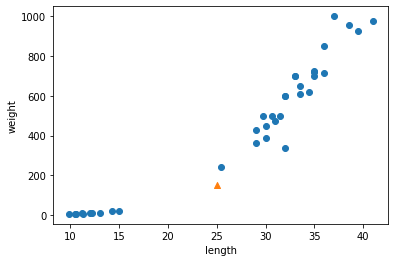

In [16]:
# 위 샘플과 다른 데이터의 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# kneighbors() 메서드 활용하여 원인 분석하기

In [17]:
distances, indexes = kn.kneighbors([[25,150]])

In [18]:
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


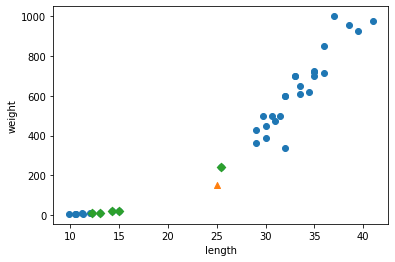

In [19]:
plt.scatter(train_input[:,0], train_input[:,1])     # train_input 배열 전체에서 0번째 열, 1번째 열을 각각 선점도로 나타낸다. // 0번째 열 : length, X축, 1번째 열 : weight, Y축을 나타냄
plt.scatter(25, 150, marker='^')                    # 25, 150 위치에 삼각형(^) 마크를 그린다.
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')     # train_input 배열에서 indexes에 해당하는 샘플중에 0번째 열, 1번째 열을 선점도로 나타낸다. // 0번째 열 : length, X축, 1번째 열 : weight, Y축
plt.xlabel('length')        # X축 라벨을 length
plt.ylabel('weight')        # Y축 라벨을 weight
plt.show()

In [20]:
print(train_input[indexes])
# print(train_input[[21, 33, 19, 30,  1]])      #indexes 는 array 배열로 나옴. (1, 5) 배열
print(indexes.shape)
print(distances.shape)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
(1, 5)
(1, 5)


In [21]:
print(train_input[:,0])     # length의 0 열
print(train_input[:,1])     # weight의 1 열

[29.7 12.2 33.  11.3 39.5 29.  36.  36.  31.  35.  37.  11.2 34.5 12.
 29.  33.  30.7 38.5 33.5 14.3 31.5 25.4  9.8 32.  10.5 33.5 10.6 35.
 32.  35.  13.  30.  32.  15.  30.  41. ]
[ 500.    12.2  700.     8.7  925.   430.   714.   850.   475.   720.
 1000.     9.8  620.     9.8  363.   700.   500.   955.   650.    19.7
  500.   242.     6.7  600.     7.5  610.     7.   700.   600.   725.
   12.2  450.   340.    19.9  390.   975. ]


In [22]:
print(train_input[indexes, 0])   # length의 0 열
print(train_input[indexes, 1])   # weight의 1 열

[[25.4 15.  14.3 13.  12.2]]
[[242.   19.9  19.7  12.2  12.2]]


In [23]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


> - 길이가 25, 무게가 150인 생선에 가장 가까운 이웃에는 빙어가 4마리로 압도적으로 많다.
> - 산점도 상에서는 도미와 가깝게 보이는데, 왜 가장 가까운 이웃이 빙어가 되었을까?

In [24]:
print(train_target[indexes])
print(distances)

[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


> # 큰 문제는 , x축은 거리가 좁고, y 축은 거리가 넓다

# x축 범위를 동일하기 0~1000으로 맞추기
- xlim() 함수

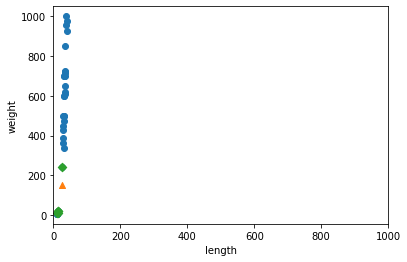

In [25]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))      # 튜플형태로 크기를 정해야 함!
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> ## 두 특성( 길이와 무게) 의 값이 놓인 범위가 매우 다르다
> ## 이를 두 특성의 `스케일`이 다르다고 말한다.

# 데이터 전처리
> - 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다.
> - 특성값을 일정한 기준으로 맞춰 주어야 한다.

>> 가장 널리 사용되는 전처리 방법 중 하나는 `표준점수 (standard score)`이다.

### 평균을 빼고, 표준편차를 나누어주면 된다.

In [26]:
mean = np.mean(train_input, axis=0)     # 평균을 계산한다.
std = np.std(train_input, axis=0)       # 표준편차를 계산한다.


# 각 특성별로 계산해야 한다.
# 따라서 axis=0으로 지정했다.               // axis : 0 - 행 , 1 - 열 (?)   
#                                       (http://machinelearningkorea.com/2019/05/18/%ED%8C%8C%EC%9D%B4%EC%8D%AC-axis-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%B9%98%ED%8A%B8%EC%BD%94%EB%93%9C/)
# 행을 따라 각 열의 통계 값을 계산한다.

In [27]:
# axis 이해하기
print(np.sum(train_input,axis=0), np.sum(train_input, axis=0).shape)        # 36 * 2 배열의 train_input의 axis=0을 하면, 2개만...!
print(np.sum(train_input,axis=1), np.sum(train_input, axis=1).shape)        # 36 * 2 배열의 train_input의 axis=1을 하면, 36개!

[  982.7 16347.5] (2,)
[ 529.7   24.4  733.    20.   964.5  459.   750.   886.   506.   755.
 1037.    21.   654.5   21.8  392.   733.   530.7  993.5  683.5   34.
  531.5  267.4   16.5  632.    18.   643.5   17.6  735.   632.   760.
   25.2  480.   372.    34.9  420.  1016. ] (36,)


In [28]:
# 계산된 평균과 표준편차 출력
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


# 원본 데이터에서 평균을 빼고, 표준편차로 나누어 표준점수로 변환하기

In [29]:
train_scaled = (train_input - mean) / std

> ### 브로드캐스팅 : 
> - 넘파이 배열 사이에서 일어나는 것. 
> - train_input, mean, std가 모두 넘파이 배열이다.
> - train_input의 모든 행에서 mean에 있는 두 평균값을 뺀다.
> - 그 다음 std에 있는 두 표준편차를 다시 모든 행에 적용시킨다.

# 전처리 데이터로 모델훈련하기

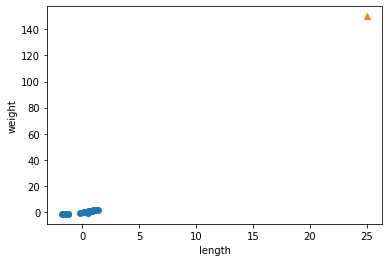

In [30]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> ### 샘플 25, 150 역시 동일한 비율로 변환해주어야 한다.

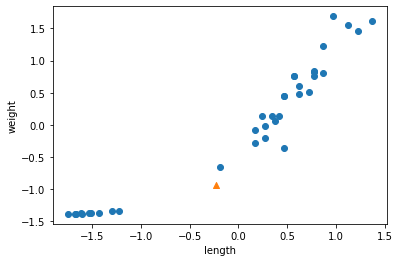

In [31]:
# 샘플 전처리하기
new = ([25,150] - mean) / std
# print(new)
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [33]:
test_scaled = (test_input - mean) / std

In [34]:
kn.score(test_scaled, test_target)

1.0

In [35]:
print(kn.predict([new]))

[1.]


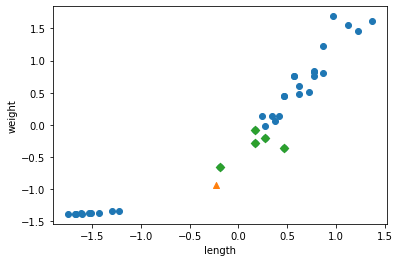

In [36]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 코드 정리

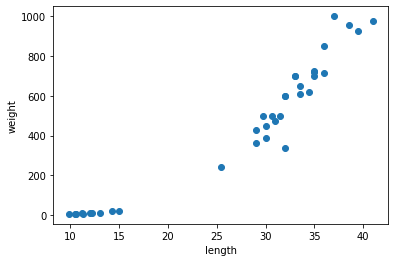

[0.]


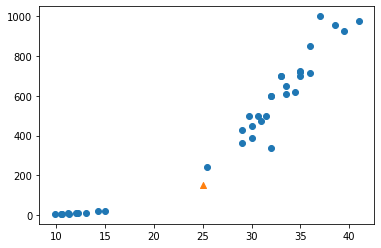

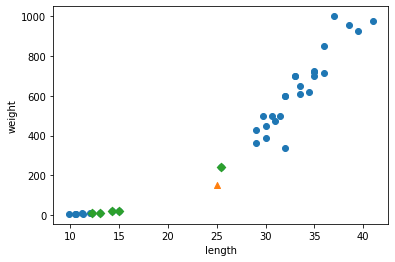

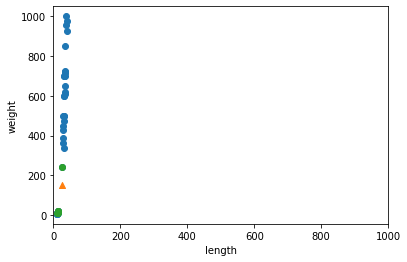

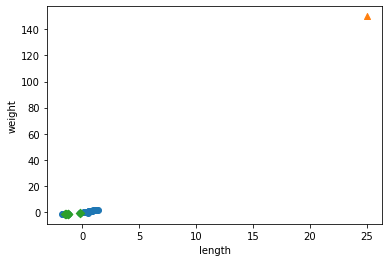

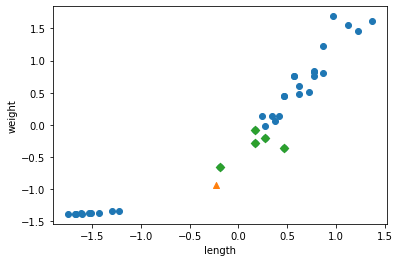

[1.]
1.0


In [44]:
# 1. 물고기 feature 가져오기
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 2. 이진분류 (np.ones(), np.zeros())하기, np.concatenate()
import numpy as np
fish_target = np.concatenate([np.ones(35), np.zeros(14)])

# 3. 특성 합쳐서 fish_data 만들기
fish_data = np.column_stack([fish_length, fish_weight])

# 4. 사이킷런으로 train_test_split() import
from sklearn.model_selection import train_test_split

# 5. TTS에 데이터 집어넣기, stratify로 샘플링 편향 줄이기
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

# 6. K-최근접 import 및 훈련시키기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

# 7. scatter(선점도) 찍어보기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 8. predict 해보기
print(kn.predict([[25, 150]]))      # 0이 뜬다... 

# 9. scatter(선점도) 찍어보기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.show()

# 10. distances, indexes 찾기 // kneighbors 메서드 이용
distances, indexes = kn.kneighbors([[25, 150]])

# 11. scatter로 다시 표현해보기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 12. 원인분석하기 // 각 특성의 스케일 동일화 해보기        >> 문제점 발견
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1])
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 13. 전처리하기 , 분산, 표준편차, 표준점수(standard score)
mean = np.mean(train_input, axis=0)     # 평균
std = np.std(train_input, axis=0)       # 표준편차

train_scaled = (train_input - mean) / std       # 훈련용 데이터 브로드캐스팅
test_scaled = (test_input - mean) / std         # 테스트용 데이터 브로드캐스팅

# 14. 스케일 바뀐 train_scaled를 kn.fit 시키기
kn.fit(train_scaled, train_target)

# 14. scaled 된 값으로 scatter 다시 그리기
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')            # 해당 값도 전처리를 해야한다!
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 15. 찾고자 하는 값 전처리 하기 // distances, indexes 값 재 설정
new = ([25, 150] - mean) / std
distances, indexes = kn.kneighbors([new])

# 16. 최종 scatter
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()      # 정상적으로 실행되었다.


# 17. 특정값 Predict 하기
print(kn.predict([new]))
print(kn.score(test_scaled, test_target))

def predict(feature):
    # plt.scatter()
    return

# 최종 정리


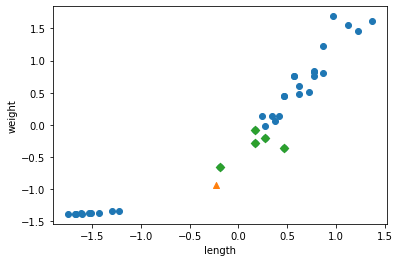

[1.]


In [67]:
# 피쳐 가져오기
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 데이터 합치기
import numpy as np
fish_data = np.column_stack([fish_length, fish_weight])
fish_target = np.concatenate([np.ones(35), np.zeros(14)])

# sklearn
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

# K- 최근접 이웃
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

# 전처리 (standard score)
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

# 전처리 적용
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std
new = ([25, 150] - mean) / std

# kn 재 훈련
kn.fit(train_scaled, train_target)

# distances, indexes 구하기
distances, indexes = kn.kneighbors([new])

# scatter
import matplotlib.pyplot as plt
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 특정 값 측정
print(kn.predict([new]))

# 함수화 하기

In [85]:
def predict_fish(feature):
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    import matplotlib.pyplot as plt

    # 물고기 특성 (feature) 고정
    fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
    fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
    
    # 물고기 샘플 저장
    fish_data = np.column_stack([fish_length, fish_weight])
    fish_target = np.concatenate([np.ones(35), np.zeros(14)])

    # sklearn의 tts를 통해 분류
    train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

    # 전처리 진행
    mean = np.mean(train_input, axis = 0)           # axis 넣는걸 깜빡한다...
    std = np.mean(train_input, axis = 0)            # axis 넣기!!

    train_scaled = (train_input - mean) / std
    test_scaled = (test_input - mean) / std
    
    # K - 최근접 이웃 import
    kn = KNeighborsClassifier()
    kn.fit(train_scaled, train_target)

    # 제시된 규격의 물고기 데이터 변환
    answer = (feature - mean) / std
    
    # distances , indexes 만들기
    distances, indexes = kn.kneighbors([answer])

    # 선점도 그리기
    plt.scatter(train_scaled[:,0], train_scaled[:,1])
    plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
    plt.scatter(answer[0], answer[1], marker='^')
    plt.xlabel('length')
    plt.ylabel('weigth')
    plt.show()

    # 제시된 규격의 물고기 예측하기
    answer = kn.predict([answer])

    # 결과 도출
    return answer

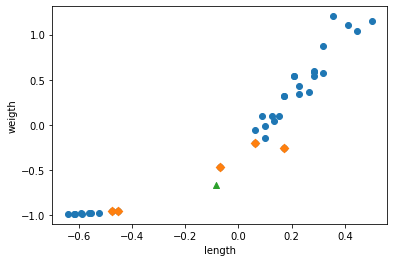

array([1.])

In [86]:
predict_fish([25, 150])

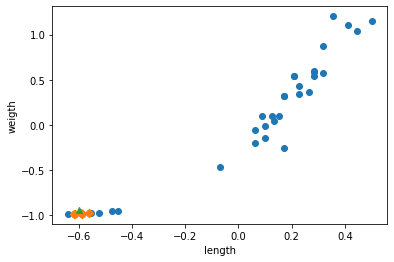

array([0.])

In [87]:
predict_fish([11, 25])

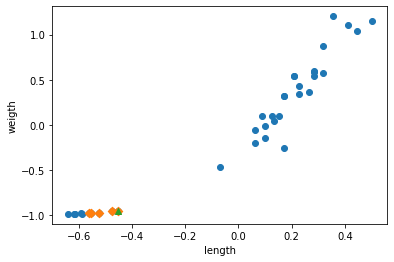

array([0.])

In [92]:
predict_fish([15, 19.9])